In [1]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [1]:
# import wewenętrznej bazy danych
import sqlite3

In [2]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [3]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\anicka\\Desktop\\js'

In [5]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [6]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [7]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Orders"]

In [8]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [10]:
selectCities = '''SELECT city,numorderlines,numunits from orders '''
citiesDF = pd.read_sql_query(selectCities, dbConnection)

In [11]:
onlyThreecities=citiesDF.loc[citiesDF["city"].isin(["NEW YORK", "WASHINGTON", "BROOKLYN"])]
onlyThreecities.head()

,city,numorderlines,numunits
14,BROOKLYN,1,1
21,NEW YORK,1,3
29,NEW YORK,1,1
33,NEW YORK,1,2
48,NEW YORK,1,1


In [12]:
%matplotlib inline
sns.set()

C:\Users\anicka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


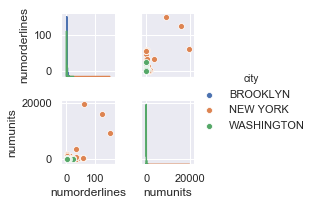

In [13]:
sns.pairplot(onlyThreecities, hue='city', height=1.5);

In [14]:
# Correlation heatmap

In [15]:
# calculate the correlation matrix
corr = onlyThreecities.corr()

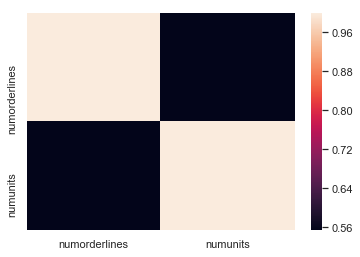

In [16]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [17]:
ordersSelect = '''SELECT totalprice, customerid,orderid from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)
orders.head()

,totalprice,customerid,orderid
0,190.00,45978,1002854
1,10.00,125381,1002855
2,35.22,103122,1002856
3,10.00,130980,1002857
4,10.00,48553,1002886


In [18]:
customersSelect = '''SELECT customerid, gender from customers '''
customers = pd.read_sql_query(customersSelect, dbConnection)

In [19]:
customers.head()

,customerid,gender
0,174596,M
1,68239,M
2,10203,F
3,174288,F
4,68099,M


In [20]:
ordersCustomer = orders.merge(customers, on='customerid')

In [21]:
ordersCustomer.head()

,totalprice,customerid,orderid,gender
0,190.00,45978,1002854,M
1,10.00,125381,1002855,M
2,35.22,103122,1002856,None
3,10.00,130980,1002857,F
4,10.00,48553,1002886,None


In [22]:
orderLinesSelect = '''SELECT orderlineid, orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)

In [23]:
orderLines.head()

,orderlineid,orderid,productid,billdate
0,1010561,1006414,10834,2011-03-08 00:00:00
1,1010562,1006541,11052,2011-01-20 00:00:00
2,1010563,1006542,11070,2011-01-20 00:00:00
3,1010564,1010154,11196,2009-11-20 00:00:00
4,1010565,1009110,11048,2009-11-12 00:00:00


In [24]:
orderlinesOrderCustomer = orderLines.merge(ordersCustomer, on='orderid')

In [25]:
orderlinesOrderCustomer.head()

,orderlineid,orderid,productid,billdate,totalprice,customerid,gender
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,48167,M
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,48167,M
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,15824,M
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,124842,M
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,49720,M


In [26]:
orderlinesOrderCustomer["billdate"] = pd.to_datetime(orderlinesOrderCustomer["billdate"]).dt.year

In [27]:
orderlinesOrderCustomer.head()

,orderlineid,orderid,productid,billdate,totalprice,customerid,gender
0,1010561,1006414,10834,2011,36.00,48167,M
1,1010560,1006414,10842,2011,36.00,48167,M
2,1010562,1006541,11052,2011,20.00,15824,M
3,1010563,1006542,11070,2011,19.12,124842,M
4,1010564,1010154,11196,2009,14.95,49720,M


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

model = LinearRegression(fit_intercept=True)
model = GaussianNB()

In [40]:
a= pd.get_dummies(orderlinesOrderCustomer["billdate"])


TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [30]:


model.fit(x[, np.newaxis], y)


xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

SyntaxError: invalid syntax (<ipython-input-30-da6f4e4e8132>, line 3)

In [44]:
razem =  pd.DataFrame({1:orderlinesOrderCustomer,2:a})

ValueError: If using all scalar values, you must pass an index

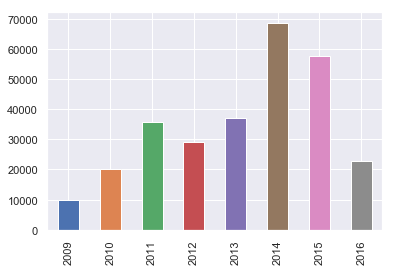

In [40]:
t = orderlinesOrderCustomer
(t.billdate).value_counts().sort_index().plot(kind='bar')

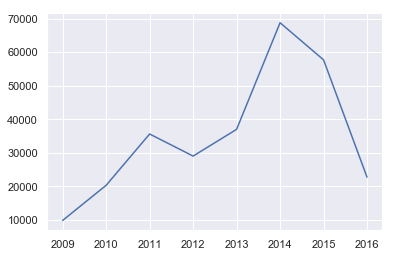

In [41]:
t = orderlinesOrderCustomer
(t.billdate).value_counts().sort_index().plot()

In [46]:
pogrupowanie = orderlinesOrderCustomer.groupby(['customerid', 'billdate']).size()
c = orderlinesOrderCustomer
c = c.groupby(['customerid', 'billdate']).size()
c = c.unstack()
c = c.fillna(0)
c.head(2000)

billdate,2009,2010,2011,2012,2013,2014,2015,2016
customerid,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
type(pogrupowanie)
pogrupowanie = orderlinesOrderCustomer.groupby(['customerid', 'billdate']).size()
pogrupowanie

customerid  billdate
1           2012        1
2           2011        1
3           2014        1
4           2010        1
5           2011        1
6           2010        1
7           2014        3
8           2014        4
9           2010        1
10          2015        3
11          2014        1
12          2012        1
13          2011        1
14          2011        1
15          2014        1
16          2015        2
17          2015        1
18          2016        1
19          2011        2
20          2011        1
21          2011        1
22          2009        2
23          2016        1
24          2012        1
25          2010        2
26          2009        1
27          2011        1
28          2015        1
29          2016        1
30          2012        1
                       ..
189530      2016        2
189531      2016        1
189532      2016        1
189533      2016        1
189534      2016        2
189535      2016        2
189536      2016 

In [50]:
type(orderlinesOrderCustomer)

pandas.core.frame.DataFrame

In [64]:
a =pogrupowanie.to_frame() 

In [65]:
type(a)

pandas.core.frame.DataFrame

In [77]:
pogrupowanie[customerid]

NameError: name 'customerid' is not defined

In [95]:
c = orderlinesOrderCustomer
c = c.groupby(['customerid', 'billdate']).size()



In [96]:
df = c.rename(columns={'': 'newName1'})

In [85]:
c= pd.DataFrame(c)

C:\Users\anicka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>